# Import Required Libraries

In [1]:
import sys

sys.path.insert(0, "../../src")
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import pylab as pl

from WSMBSS import *
from general_utils import *
from visualization_utils import *

import warnings

warnings.filterwarnings("ignore")
notebook_name = "Nonnegative_Antisparse_Copula"

# Source Generation and Mixing Scenario

In [2]:
rho = 0.0
N = 500000
NumberofSources = 5
NumberofMixtures = 10

SNR = 30  # dB

S = generate_correlated_copula_sources(
    rho=rho,
    df=4,
    n_sources=NumberofSources,
    size_sources=N,
    decreasing_correlation=False,
)

A = np.random.standard_normal(size=(NumberofMixtures, NumberofSources))
X = A @ S

X, NoisePart = addWGN(X, SNR, return_noise=True)

SNRinp = 10 * np.log10(
    np.sum(np.mean((X - NoisePart) ** 2, axis=1))
    / np.sum(np.mean(NoisePart**2, axis=1))
)

print("The following is the mixture matrix A")
display_matrix(A)
print("Input SNR is : {}".format(SNRinp))

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 30.003562420951503


# Visualize Generated Sources and Mixtures

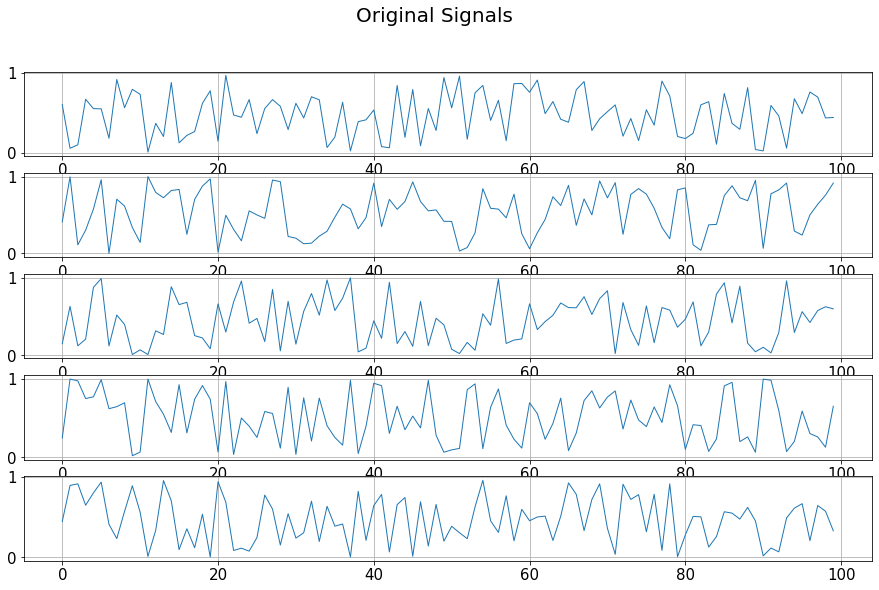

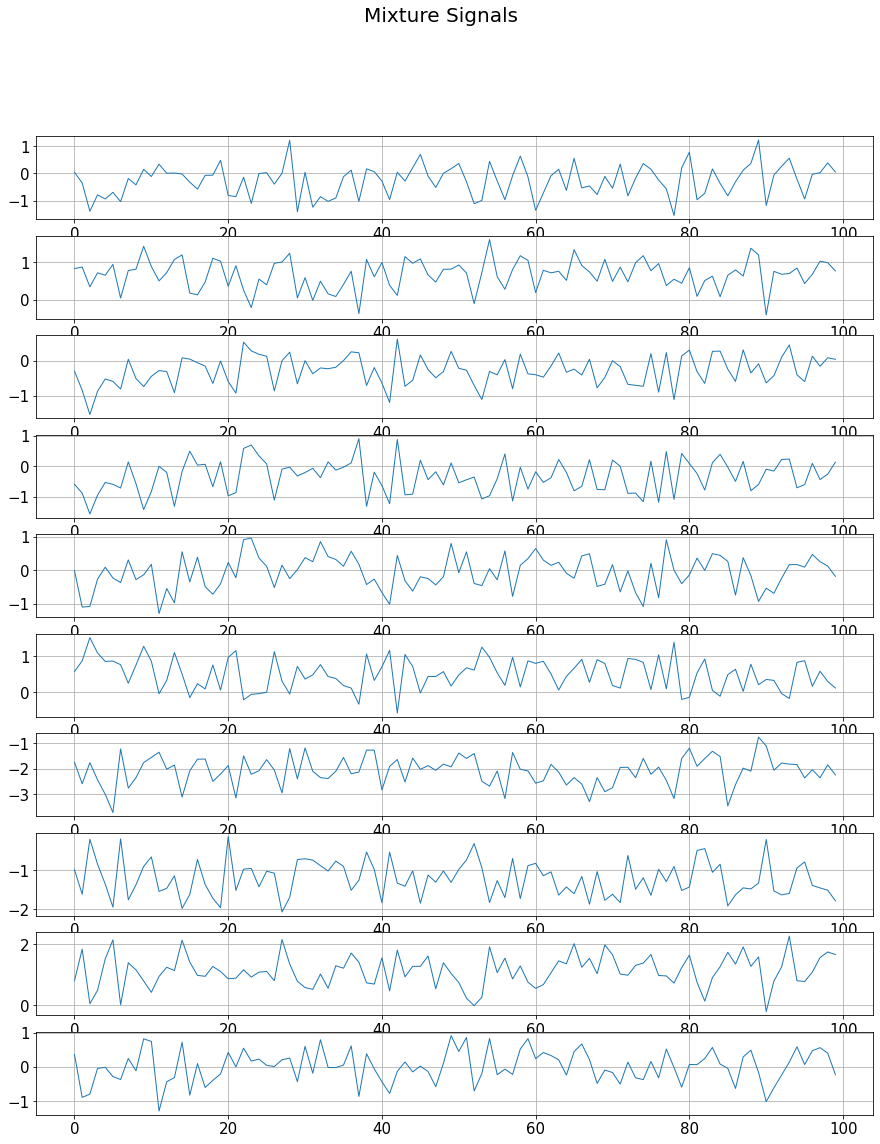

In [3]:
subplot_1D_signals(
    S[:, 0:100], title="Original Signals", figsize=(15.2, 9), colorcode=None
)
subplot_1D_signals(
    X[:, 0:100], title="Mixture Signals", figsize=(15, 18), colorcode=None
)

# Algorithm Hyperparameter Selection and Weight Initialization

In [4]:
# if rho > 0.4:
#     gamma_start = 0.05
#     gamma_stop = 5*1e-4
# else:
#     gamma_start = 0.1
#     gamma_stop = 1e-3
# OUTPUT_COMP_TOL = 1e-7
# MAX_OUT_ITERATIONS= 3000
# LayerGains = [4,1]
# LayerMinimumGains = [1e-3,1e-3]
# LayerMaximumGains = [1e6,20]
# WScalings = [0.0033,0.0033]
# GamScalings = [1,1]
# zeta = 1*1e-5
# beta = 0.5
# muD = [1e-3, 1e-3]

# s_dim = S.shape[0]
# x_dim = X.shape[0]
# h_dim = s_dim
# samples = S.shape[1]
# W_HX = np.eye(h_dim, x_dim)
# W_YH = np.eye(s_dim, h_dim)

# if rho > 0.4:
#     gamma_start = 0.05
#     gamma_stop = 5*1e-4
# else:
#     gamma_start = 0.1
#     gamma_stop = 1e-3
# OUTPUT_COMP_TOL = 1e-7
# MAX_OUT_ITERATIONS= 3000
# LayerGains = [1,1]
# LayerMinimumGains = [1e-3,1e-3]
# LayerMaximumGains = [1e6,20]
# WScalings = [0.0033,0.0033]
# GamScalings = [2,1]
# zeta = 1*1e-5
# beta = 0.5
# muD = [1, 1e-2]

# s_dim = S.shape[0]
# x_dim = X.shape[0]
# h_dim = s_dim
# samples = S.shape[1]
# W_HX = np.eye(h_dim, x_dim)
# W_YH = np.eye(s_dim, h_dim)


# if rho > 0.4:
#     gamma_start = 0.1
#     gamma_stop = 5*1e-4
# else:
#     gamma_start = 0.1
#     gamma_stop = 1e-3
# OUTPUT_COMP_TOL = 1e-7
# MAX_OUT_ITERATIONS= 3000
# LayerGains = [4,1]
# LayerMinimumGains = [1e-3,1e-3]
# LayerMaximumGains = [1e6,20]
# WScalings = [0.0033,0.0033]
# GamScalings = [1,1]
# zeta = 1*1e-5
# beta = 0.5
# muD = [1e-2, 1e-3]

# # OPTIONS FOR synaptic_lr_rule: "constant", "divide_by_log_index", "divide_by_index"
# synaptic_lr_rule = "divide_by_log_index"
# # OPTIONS FOR neural_loop_lr_rule: "constant", "divide_by_loop_index", "divide_by_slow_loop_index"
# neural_loop_lr_rule = "divide_by_slow_loop_index"
# s_dim = S.shape[0]
# x_dim = X.shape[0]
# h_dim = s_dim
# samples = S.shape[1]
# W_HX = np.eye(h_dim, x_dim)
# W_YH = np.eye(s_dim, h_dim)


# if rho > 0.4:
#     gamma_start = 0.25
#     gamma_stop = 5*1e-4
# else:
#     gamma_start = 0.25
#     gamma_stop = 1e-3
# OUTPUT_COMP_TOL = 1e-7
# MAX_OUT_ITERATIONS= 3000
# LayerGains = [4,1]
# LayerMinimumGains = [1e-3,1e-3]
# LayerMaximumGains = [1e6,20]
# WScalings = [0.0033,0.0033]
# GamScalings = [0.1,0.1]
# zeta = 1*1e-5
# beta = 0.5
# muD = [20, 1e-3]

# # OPTIONS FOR synaptic_lr_rule: "constant", "divide_by_log_index", "divide_by_index"
# synaptic_lr_rule = "divide_by_log_index"
# # OPTIONS FOR neural_loop_lr_rule: "constant", "divide_by_loop_index", "divide_by_slow_loop_index"
# neural_loop_lr_rule = "divide_by_slow_loop_index"
# s_dim = S.shape[0]
# x_dim = X.shape[0]
# h_dim = s_dim
# samples = S.shape[1]
# W_HX = np.eye(h_dim, x_dim)
# W_YH = np.eye(s_dim, h_dim)

# gamma_start = 0.1
# gamma_stop = 1e-3
# OUTPUT_COMP_TOL = 1e-6
# MAX_OUT_ITERATIONS= 3000
# LayerGains = [2,1]
# LayerMinimumGains = [1,1]
# LayerMaximumGains = [1e6,5]
# WScalings = [0.005,0.005]
# GamScalings = [1,1]
# zeta = 1*1e-5
# beta = 0.5
# muD = [.25, 1e-3]

# s_dim = S.shape[0]
# x_dim = X.shape[0]
# h_dim = x_dim
# samples = S.shape[1]
# W_HX = np.eye(h_dim, x_dim)
# W_YH = np.eye(s_dim, h_dim)

# gamma_start = 0.1
# gamma_stop = 1e-5

# gammaM_start = np.array([gamma_start, gamma_start])
# gammaM_stop = np.array([gamma_stop,gamma_stop])
# gammaW_start = np.array([gamma_start,gamma_start])
# gammaW_stop = np.array([gamma_stop, gamma_stop])

# OUTPUT_COMP_TOL = 1e-6
# MAX_OUT_ITERATIONS= 3000
# LayerGains = [2,1]
# LayerMinimumGains = [1,1]
# LayerMaximumGains = [1e6,5]
# WScalings = [0.005,0.005]
# GamScalings = [np.sqrt(2),1]
# zeta = 1*1e-5
# beta = 0.5
# muD = [.1, 1e-3]

# s_dim = S.shape[0]
# x_dim = X.shape[0]
# h_dim = s_dim
# samples = S.shape[1]
# W_HX = 2*np.eye(h_dim, x_dim)
# W_YH = np.eye(s_dim, h_dim)

# # OPTIONS FOR synaptic_lr_rule: "constant", "divide_by_log_index", "divide_by_index"
# synaptic_lr_rule = "divide_by_log_index"
# # OPTIONS FOR neural_loop_lr_rule: "constant", "divide_by_loop_index", "divide_by_slow_loop_index"
# neural_loop_lr_rule = "divide_by_slow_loop_index"

# synaptic_lr_decay_divider = 15000
# neural_lr_decay_multiplier = 0.01
# hidden_layer_gain = 25

gamma_start = 0.05
gamma_stop = 1e-3

gammaM_start = np.array([gamma_start, gamma_start])
gammaM_stop = np.array([gamma_stop, gamma_stop])
gammaW_start = np.array([gamma_start, gamma_start])
gammaW_stop = np.array([gamma_stop, gamma_stop])

OUTPUT_COMP_TOL = 1e-6
MAX_OUT_ITERATIONS = 3000
LayerGains = [0.5, 0.5]
LayerMinimumGains = [0.2, 0.2]
LayerMaximumGains = [1e6, 5001]
WScalings = [0.005, 0.005]
GamScalings = [2, 1]
zeta = 1 * 1e-3
beta = 0.5
muD = [0.01, 0.01]

s_dim = S.shape[0]
x_dim = X.shape[0]
h_dim = s_dim
samples = S.shape[1]
W_HX = np.eye(h_dim, x_dim)
W_YH = np.eye(s_dim, h_dim)

# OPTIONS FOR synaptic_lr_rule: "constant", "divide_by_log_index", "divide_by_index"
synaptic_lr_rule = "divide_by_log_index"
# OPTIONS FOR neural_loop_lr_rule: "constant", "divide_by_loop_index", "divide_by_slow_loop_index"
neural_loop_lr_rule = "divide_by_slow_loop_index"

synaptic_lr_decay_divider = 5000
neural_lr_decay_multiplier = 0.005
hidden_layer_gain = 10

# Run WSM Algorithm on Mixture Signals

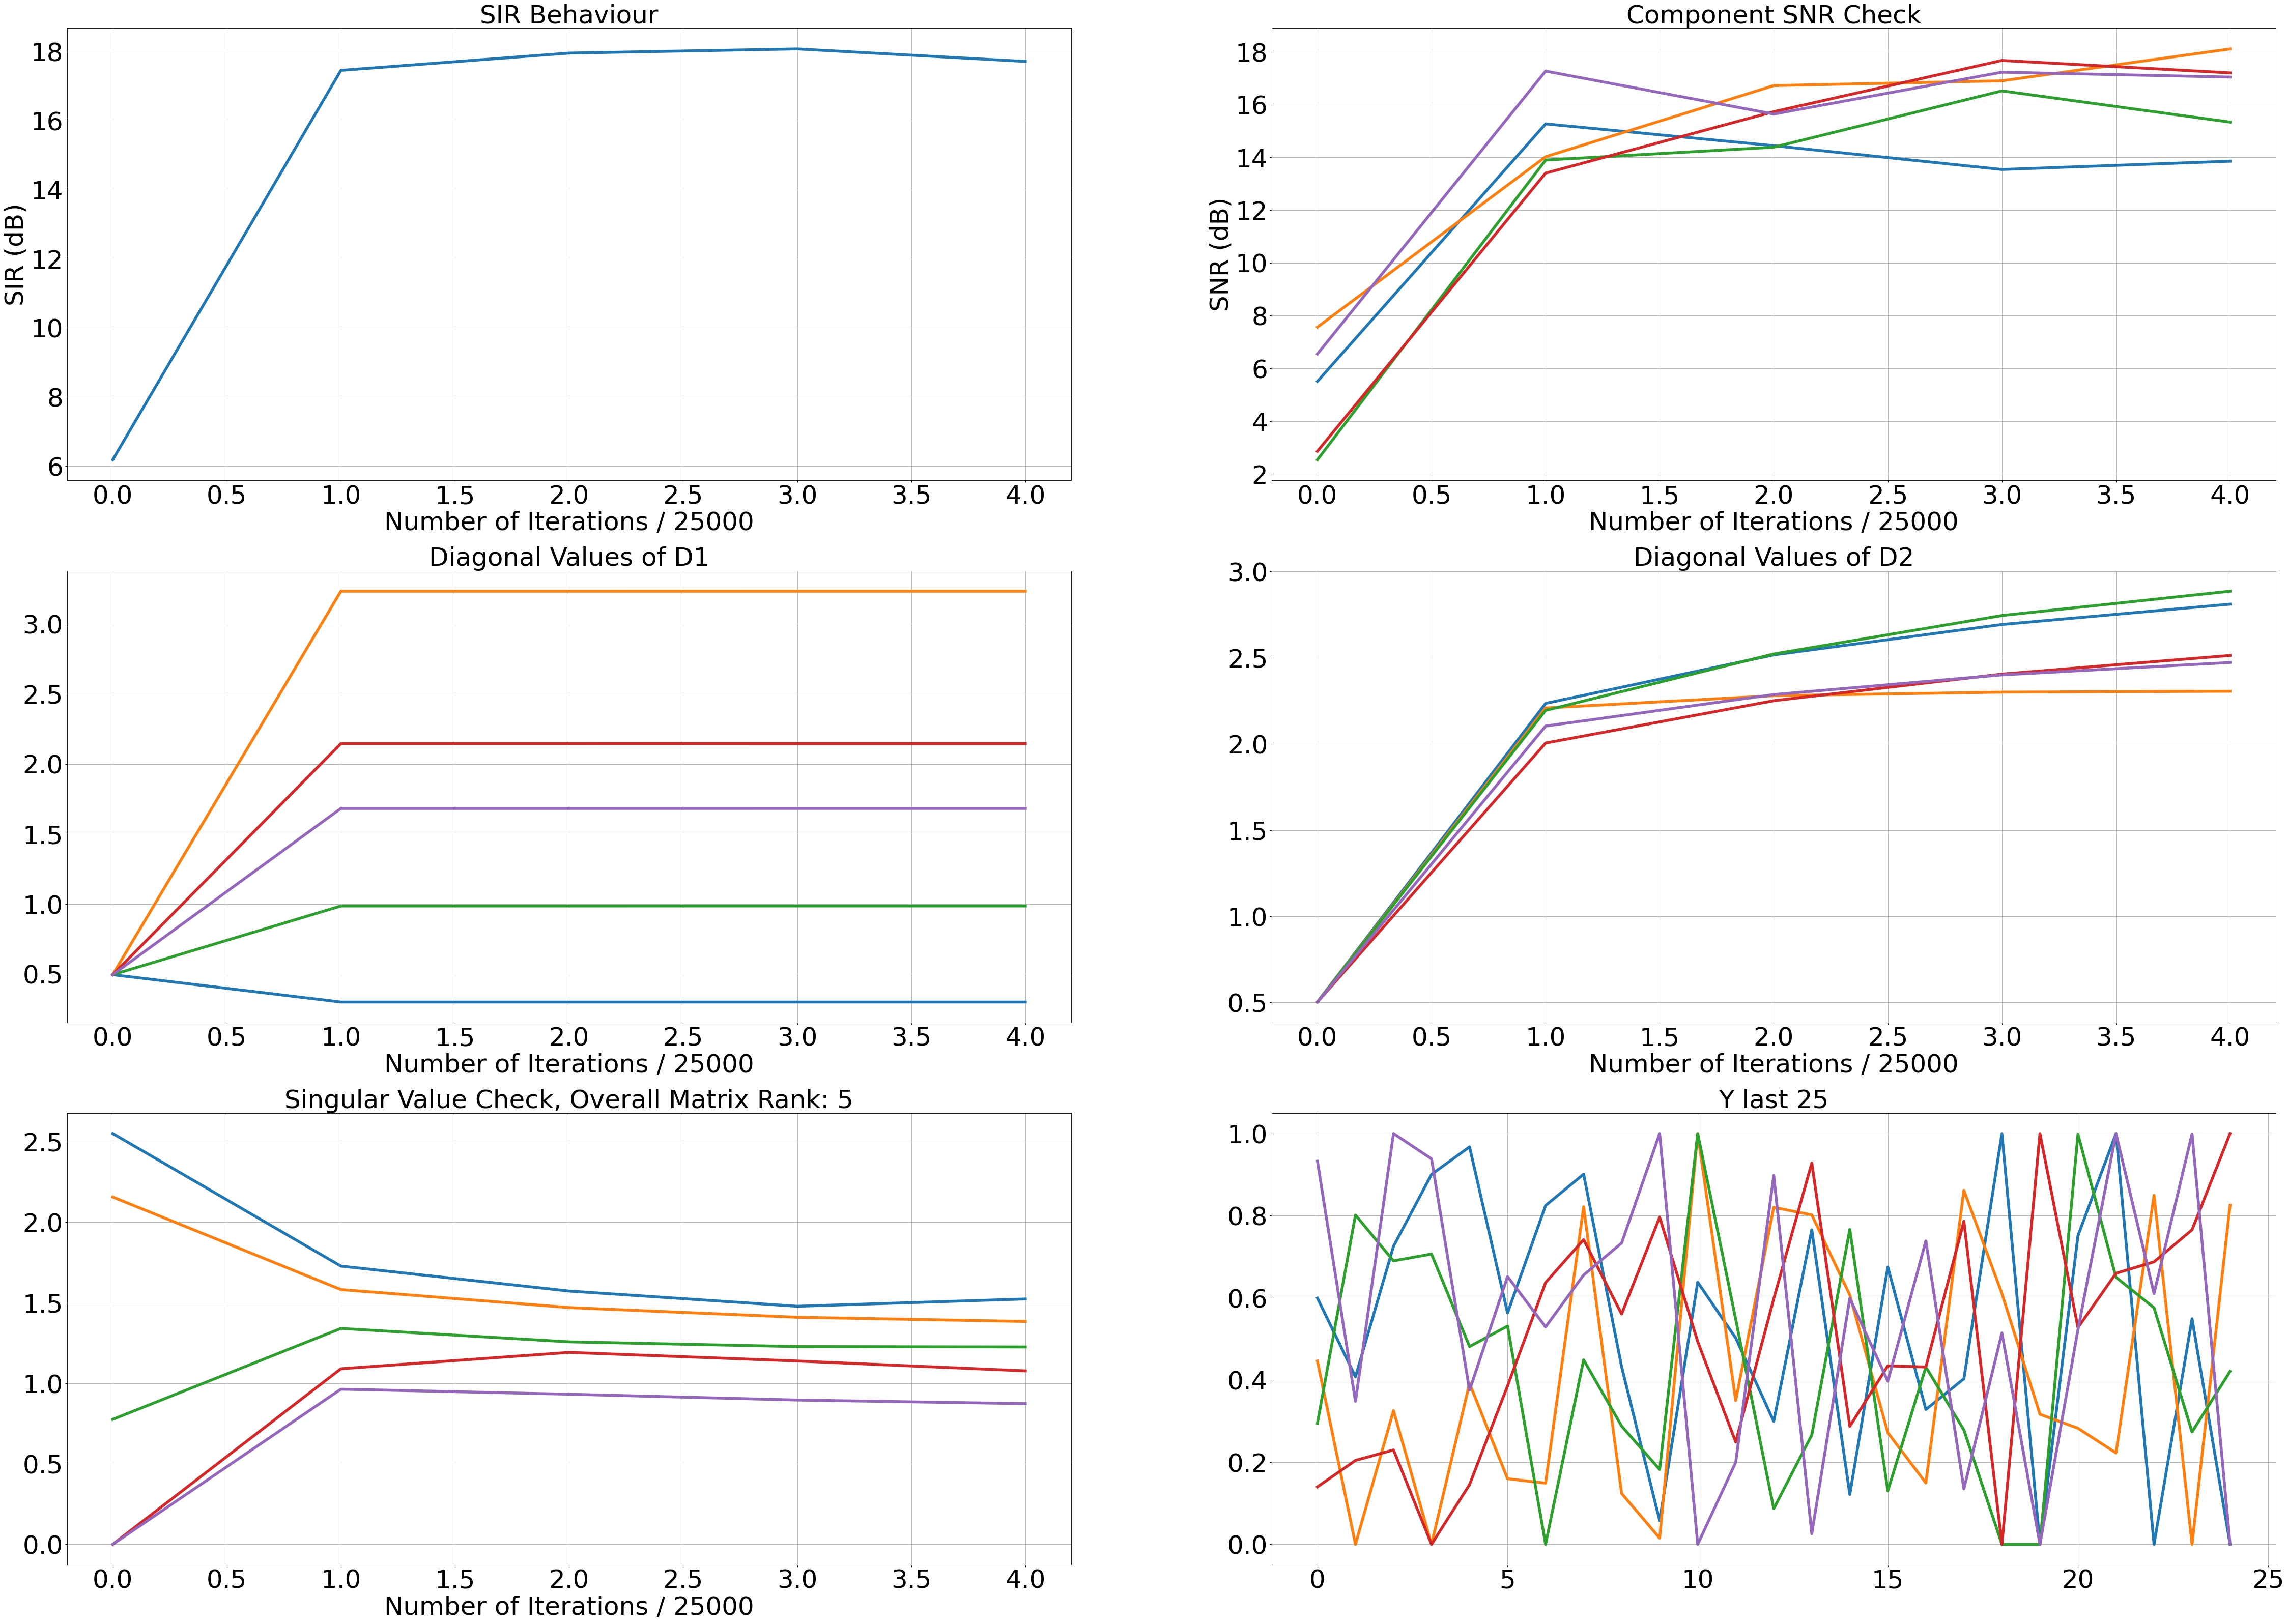

 22%|██▏       | 107833/500000 [04:55<12:21, 528.68it/s] 

In [ ]:
debug_iteration_point = 25000
modelWSM = OnlineWSMBSS(
    s_dim=s_dim,
    x_dim=x_dim,
    h_dim=h_dim,
    gammaM_start=gammaM_start,
    gammaM_stop=gammaM_stop,
    gammaW_start=gammaW_start,
    gammaW_stop=gammaW_stop,
    beta=beta,
    zeta=zeta,
    muD=muD,
    WScalings=WScalings,
    GamScalings=GamScalings,
    W_HX=W_HX,
    W_YH=W_YH,
    DScalings=LayerGains,
    LayerMinimumGains=LayerMinimumGains,
    LayerMaximumGains=LayerMaximumGains,
    neural_OUTPUT_COMP_TOL=OUTPUT_COMP_TOL,
    set_ground_truth=True,
    S=S,
    A=A,
)


modelWSM.fit_batch_nnantisparse(
    X,
    n_epochs=1,
    neural_dynamic_iterations=500,
    neural_lr_start=0.9,
    neural_lr_stop=0.01,
    synaptic_lr_rule=synaptic_lr_rule,
    neural_loop_lr_rule=neural_loop_lr_rule,
    synaptic_lr_decay_divider=synaptic_lr_decay_divider,
    neural_lr_decay_multiplier=neural_lr_decay_multiplier,
    debug_iteration_point=debug_iteration_point,
    hidden_layer_gain=hidden_layer_gain,
    plot_in_jupyter=True,
)

# Visualize SNR Convergence of Each Source Component

In [ ]:
mpl.rcParams["xtick.labelsize"] = 18
mpl.rcParams["ytick.labelsize"] = 18
plot_convergence_plot(
    modelWSM.SNR_list,
    xlabel="Number of Iterations / {}".format(debug_iteration_point),
    ylabel="SINR (dB)",
    title="SINR Convergence Plot",
    colorcode=None,
    linewidth=1.8,
)

# Calculate Resulting Component SNRs and Overall SINR

In [ ]:
Wf = modelWSM.compute_overall_mapping(return_mapping=True)
Y = Wf @ X
Y_ = signed_and_permutation_corrected_sources(S, Y)
coef_ = ((Y_ * S).sum(axis=1) / (Y_ * Y_).sum(axis=1)).reshape(-1, 1)
Y_ = coef_ * Y_

print("Component SNR Values : {}\n".format(snr_jit(S, Y_)))

SINRwsm = 10 * np.log10(CalculateSINRjit(Y_, S)[0])

print("Overall SINR : {}".format(SINRwsm))

In [ ]:
10 * np.log10(CalculateSINRjit(Wf @ X, S)[0])

# Vizualize Extracted Signals Compared to Original Sources

In [ ]:
subplot_1D_signals(
    Y_[:, 0:100],
    title="Extracted Signals (Sign and Permutation Corrected)",
    figsize=(15.2, 9),
    colorcode=None,
)
subplot_1D_signals(
    S[:, 0:100], title="Original Signals", figsize=(15.2, 9), colorcode=None
)